<a href="https://colab.research.google.com/github/guilmoreira/mercado_financeiro/blob/main/1_IBOV_carteira_hipot%C3%A9tica_di%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. INSTALANDO BIBLIOTECAS**



---


```
# Esta etapa irá instalar as bibliotecas necessárias para funcionamento do código
```



In [ ]:
#!pip install -U plotly
#!pip install pandas
#!pip install numpy
!pip install kora -q

     |████████████████████████████████| 57 kB 2.4 MB/s 
     |████████████████████████████████| 60 kB 5.7 MB/s 


##**2. IMPORTANDO BIBLIOTECAS**

---


```
# Importando as bibliotecas
```




In [ ]:
import pandas as pd
import numpy as np
import plotly.express as pl
import time
from time import sleep

#Usando selenium no google colab
from kora.selenium import wd
from datetime import date

#Validando certificado SSL. Não funciona sem esta biblioteca
import ssl


ssl._create_default_https_context = ssl._create_unverified_context

##**3. VARIÁVEIS INICIAIS**

---


```
# Variável de data utilizada devido ao nome do arquivo
```




In [ ]:
#Data de Hoje
today=str(date.today())

##**4. ÍNDICE**

```
# DEFINIR ÍNDICE DE ESTUDO
```
---


In [ ]:
indice_b3='ibov'
indice_b3=indice_b3.upper()
indice_b3

'IBOV'

##**5.FUNÇÃO EXTRAINDO TICKERS POR ÍNDICE**

---



```
# FUNÇÃO QUE EXTRAÍ A CARTEIRA HIPOTÉTICA PARA O ÍNDICE NAQUELA DATA OU PRÓXIMO DIA ÚTIL
# NESTA VERSÃO NÃO FUNCIONA NO SÁBADO OU DOMINGO
# NECESSÁRIO ATUALIZAR O "find_element"
```




5.1 **Referências utilizadas (03/28/2022)**

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br


In [ ]:
#Função baixa os arquivos do site

def composicao_indice(indice, delay=10):
#funçao utiliza o selenium para realizar essa tarefa
  
  link=f'https://sistemaswebb3-listados.b3.com.br/indexPage/day/{indice}?language=pt-br'
  
  wd.get(link)

#ATUALIZAR O find_element_by_id para find_element(by=By.ID)?? Pesquisar!
  sleep(5)
  wd.find_element_by_id('segment').send_keys('Setor de Atuação')
  sleep(delay)
  wd.find_element_by_link_text('Download').click()
  sleep(5)
  arquivo=f'/content/{indice.upper()}Dia_{today[8:]}-{today[5:7]}-{today[2:4]}.csv'
  return pd.read_csv(arquivo, sep=';',encoding='ISO-8859-1',skipfooter=2,engine='python',thousands='.',decimal=',',header=1,index_col=False)

##**6. EXTRAÇÃO DOS ARQUIVOS**

---



```
# DOWNLOAD DOS ARQUIVOS PARA OS ÍNDICES.
# GERADA UMA DATABASE (geral) com as carteiras
```



In [ ]:
ibov=composicao_indice(indice_b3, delay=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

find_element_by_* commands are deprecated. Please use find_element() instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

find_element_by_link_text is deprecated. Please use find_element(by=By.LINK_TEXT, value=link_text) instead



##**7. TRATANDO OS DADOS**

---


```
# NECESSÁRIO AJUSTE NOS DADOS INDIVIDUALIZADOS
# DEIXEI UM PADRÃO PARA O IBOV
```



In [ ]:
#VERIRICANDO DISCREPÂCIAS
def renomear_setor(setor):
  if setor == 'Cons N  Básico' or setor=='Cons N Cíclico': return 'Consumo Não-Cíclico'
  if setor == 'Financeiro e Outros' or setor=='Financ e Outros': return 'Financeiro'
  if setor == 'Telecomunica' : return 'Telecomunicação'
  if setor == 'Utilidade Públ' : return 'Utilidade Pública'
  if setor == 'Bens Indls' : return 'Bens Industriais'
  if setor == 'Mats Básicos' : return 'Materiais Básicos'
  if setor == 'Petróleo' : return 'Petróleo'  
  if setor == 'Saúde' : return 'Saúde'  
  if setor == 'Tec.Informação' : return 'Tecnologia da Informação'  
  if setor == 'Telecomunicaçã' : return 'Comunicação'
  if setor == 'Diverso' : return 'Diversos'  
  if setor == 'Consumo Cíclico' : return 'Consumo Cíclico'
  if setor == 'Comput e Equips' : return 'Comput e Equips'
  else: return setor

In [ ]:
def renomear_subsetor(subsetor):
  if subsetor == 'Máqs e Equips' : return 'Máquinas e Equipamentos'
  if subsetor == 'Mat Transporte' : return 'Material de Transporte'
  if subsetor == 'Comput e Equips' : return 'Computadores e Equipamentos'
  if subsetor == 'Comércio Distr.' : return 'Comércio e Distribuição'
  if subsetor == 'Pr Pessoal Limp' : return 'Produtos Limpeza'
  if subsetor == 'Tecid Vest Calç' : return 'Tecido, Vestuário e Calçados'
  if subsetor == 'Constr Civil' : return 'Construção Civil'
  if subsetor == 'Explor Imóveis' : return 'Exploração de Imóveis'
  if subsetor == 'Interms Financs' : return 'Intermediários Financeiro'
  if subsetor == 'Previd  Seguros' : return 'Previdência e Seguros'
  if subsetor == 'Sid Metalurgia' : return 'Siderurgia e Metalurgia'
  if subsetor == 'SM Hosp An.Diag' : return 'Serviços Médicos - Hospitalares, Análises e Diagnósticos'
  if subsetor == 'Programas Servs' : return 'Programas e Serviços'  
  if subsetor == 'Energ Elétrica' : return 'Energia Elétrica'
  if subsetor == 'Gás e Biocombustíveis' : return 'Petróleo, Gás e Biocombustíveis'
  if subsetor == 'Alimentos Processados' : return 'Alimentos Processados'
  if subsetor == 'Transportes' : return 'Transporte'
  if subsetor == 'Viagens e Lazer' : return 'Viagens e Lazer'
  if subsetor == 'Madeira e Papel' : return 'Madeira e Papel'
  if subsetor == 'Serviços Financeiros Diversos' : return 'Serviços Financeiros Diversos'
  if subsetor == 'Mineração' : return 'Mineração'
  if subsetor == 'Água Saneamento' : return 'Água Saneamento'  
  if subsetor == 'Telecomunicação' : return 'Telecomunicação'  
  if subsetor == 'Comércio' : return 'Comércio'
  if subsetor == 'Químicos' : return 'Químicos'
  if subsetor == 'Bebidas' : return 'Bebidas'
  if subsetor == 'Transporte' : return 'Transporte'     
  if subsetor == 'Diversos' : return 'Diversos'
  else: return subsetor

In [ ]:
#TRATAR OS DADOS

#Criando uma coluna de subsetor partindo da barra
ibov['SubSetor']=ibov['Setor'].apply(lambda s: s[s.rfind('/')+1:].strip())
#Subscrevendo a coluna de Setor com dados antes da barra
ibov['Setor']=ibov['Setor'].apply(lambda s: s[:s.rfind('/')].strip())
#Aplicando função
ibov['Setor']=ibov['Setor'].apply(renomear_setor)
ibov['SubSetor']=ibov['SubSetor'].apply(renomear_subsetor)

print(f' O tratamento foi concluído')

 O tratamento foi concluído


##**8. GRÁFICOS**

---



```
# COMO DADOS NÃO ESTÃO AJUSTADOS PARA TODOS OS ÍNDICES
# ALGUNS ÍNDICES PODEM NÃO FUNCIONAR
```



In [ ]:
#UTILIZAR O ÍNDICE DESEJADO
base=ibov

In [ ]:
#GRÁFICO DE PIZZA ITERATIVO

fig1=pl.sunburst(data_frame=base,path=['Setor','SubSetor','Código'], values='Part. (%)', height=1000)
fig1.update_traces(textfont_color='white',
                  textfont_size=14,
                  hovertemplate='<b>%{label}:</b> %{value:.2f}%')

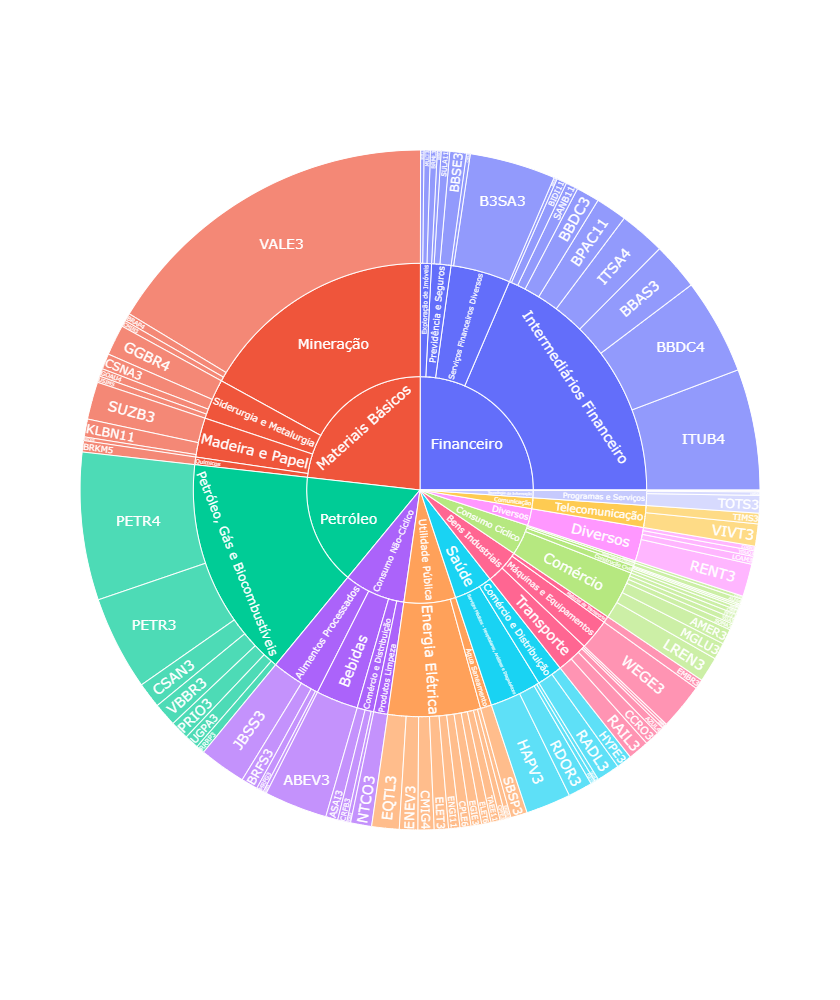

In [ ]:
#TREEMAP

fig2=pl.treemap(data_frame=base,path=['Setor','SubSetor','Código'], values='Part. (%)', height=1000)
fig2.update_traces(textfont_color='white',
                  textfont_size=14,
                  hovertemplate='<b>%{label}:</b> %{value:.2f}%')

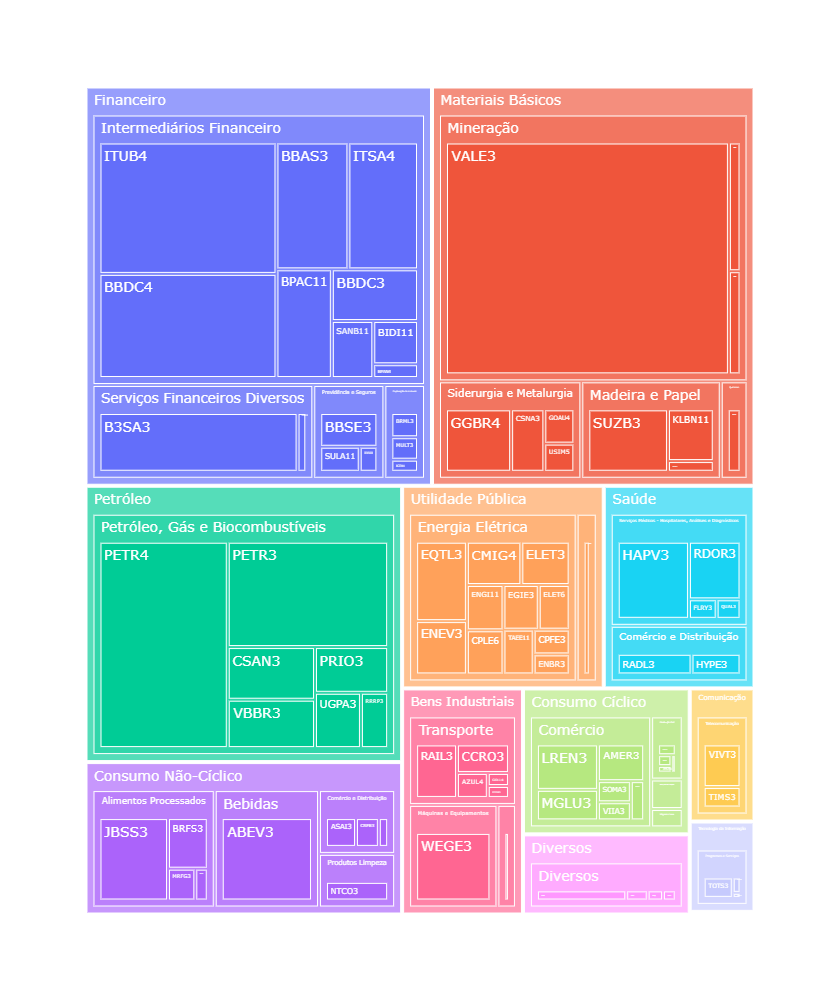

In [ ]:
print(f'Data de referência:{today}')

Data de referência:2022-04-12
